In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import glob
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#reading images
img_data = []
Train_img = [img for img in glob.glob("/content/drive/My Drive/rld/*/*.jpg")]
Test_img = [img for img in glob.glob("/content/drive/My Drive/rld/*/*.jpg")]
Y_train = []
Y_test = []
X_train = []
X_test = []


for i in Train_img:
    img = cv2.imread(i)
    X_train.append(img)
    folder = i.split("/")
    if(folder[6] == 'normal_training'):
      Y_train.append(0)
    else:
      Y_train.append(1)

for i in Test_img:
    img = cv2.imread(i)
    X_test.append(img)
    folder = i.split("/")
    if(folder[6] == 'normal_testing'):
      Y_test.append(0)
    else:
      Y_test.append(1)



#cv2_imshow(img_data[2])

In [ ]:
print(X_test[0].shape)
d=0
for img in X_test:
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    ret, th = cv2.threshold(new_img[:,:,1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    from scipy import ndimage
    img1 = ndimage.binary_fill_holes(th).astype(np.uint8)
    img1 = img1*255


    kernel =cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
    img_dilation = cv2.dilate(img1, kernel, iterations=1)

    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY ) 
    image = cv2.bitwise_and(image,img_dilation)

    X_test[d] = image
    d = d+1
    # if(d==0):
    #     plt.subplot(rows, 2, 2)
    #     plt.imshow(img, cmap='gray')
    #     d=1


# plt.show()

IndexError: ignored

In [ ]:
print(X_train[0].shape)
d=0
for img in X_train:
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    ret, th = cv2.threshold(new_img[:,:,1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    from scipy import ndimage
    img1 = ndimage.binary_fill_holes(th).astype(np.uint8)
    img1 = img1*255


    kernel =cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
    img_dilation = cv2.dilate(img1, kernel, iterations=1)

    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY ) 
    image = cv2.bitwise_and(image,img_dilation)

    X_train[d] = image
    d = d+1
    # if(d==0):
    #     plt.subplot(rows, 2, 2)
    #     plt.imshow(img, cmap='gray')
    #     d=1


# plt.show()

IndexError: ignored

[(11.467651, 34.80743106783669, 1211.557257542203, 11.408338338338336, 0.9485214795034796, 0.9013607948594929), (15.598053, 39.529128824313744, 1562.5520256091918, 14.69477477477477, 0.9240745100228387, 0.8632523650235728), (36.183201, 57.81655802963025, 3342.7543823936026, 26.167991991991997, 0.8456364112277217, 0.7165188227573003), (46.776816, 60.5657596080669, 3668.2112369021474, 24.393647647647647, 0.7791303072871603, 0.6232862615539665), (36.827295, 56.83653451771116, 3230.3916559829718, 27.551717717717715, 0.8305866610293516, 0.7020360166820991), (36.239298, 55.03423367747749, 3028.7668764671976, 27.87767967967968, 0.8210713588380397, 0.693883811304484), (26.458098, 48.93961536651471, 2395.0859522224023, 22.291823823823826, 0.8516896612616147, 0.77032979704828), (28.118132, 49.55786896982734, 2455.9823768305755, 23.503807807807803, 0.8579371873979212, 0.7545080000436958), (28.263839, 50.1193925739536, 2511.953511982075, 20.919475475475473, 0.8570384463495253, 0.7557376071974543),

In [ ]:
from scipy import stats

Xtrain = stats.zscore(Xtrain, axis = 0)
Xtest = stats.zscore(Xtest, axis = 0)

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(Xtrain)
Xtrain = pca.transform(Xtrain)

pca = decomposition.PCA(n_components=2)
pca.fit(Xtest)
Xtest = pca.transform(Xtest)

from sklearn.svm import SVC
model = SVC(kernel='rbf', gamma=3) 
model.fit(Xtrain, Y_train)
y_pred = svclassifier.predict(Xtest)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

NameError: ignored

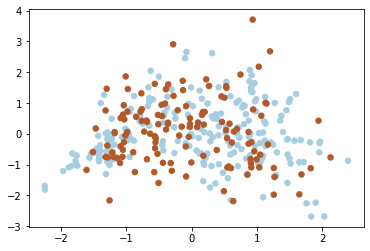

In [ ]:
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=Y_train, s=30, cmap=plt.cm.Paired)
plt.show()

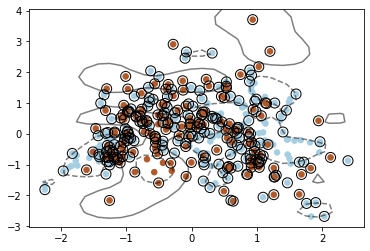

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
# X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
# clf = svm.SVC(kernel='linear', C=1000)
# clf.fit(X, y)

plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=Y_train, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()